# Este documento contiene todo el analisis realizado por el grupo 7 con la participación de
# Carlos Muñoz y Sergio Castillo para el ramo de Estadística Descriptiva donde se desarrolla un análisis acerca de las medidas de asociación, se aplica un modelo de regresión final junto a su respectivo coeficiente de determinación.
# y otros contenidos acerca de azar y probabilidad.

# ITEM I

# La correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos. Separamos por tipo de institución. Así podriamos responder a las siguientes situaciones, ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos?.

In [ ]:
import pandas as pd
df_1 = pd.read_excel('BLOQUE 4.xlsx')

#Cálculo de Coeficiente de correlación lineal de Pearson
#Para toda la BD
correlacion_1 =df_1['VALOR MATRICULA (PESOS)'].corr(df_1['VALOR ARANCEL (PESOS)'])

#Correlación por tipo de institución
tipos = df_1['TIPO DE INSTITUCION'].unique()#Creamos una lista de tipos existentes

#Construimos un bucle que calcule el valor del coeficiente de correlación lineal de pearson para
#cada tipo de institucion que se encuentre en la lista declarada arriba llamada "tipos".
for t in tipos:
    df_filtrado = df_1[df_1['TIPO DE INSTITUCION'] == t]    # filtrar por tipo
    corr = df_filtrado['VALOR MATRICULA (PESOS)'].corr(df_filtrado['VALOR ARANCEL (PESOS)'])
    print(f"Correlación para {t}: {corr}")


Correlación para Universidades CRUCH: 0.3558197585432662
Correlación para Institutos Profesionales: 0.6070842327670861
Correlación para Centros de Formacion Tecnica: 0.6868257587866281
Correlación para Universidades Privadas: 0.6597724678369123


# Luego de determinar la correlación lineal de pearson para cada tipo de institución, podemos determinar que para Universidades el valor entregado esta mas cerca del 0 y es un valor positivo, por lo tanto se trata de una correlación positiva pero bastante débil, por otra parte, para Institutos, Centros de formación y U. privadas observamos los valores se acercan más al 1 y son positivos, lo que significa que se trata de una correlación positiva un tanto más fuerte.

# Ya con esto se puede decir que aún asi visualizamos una cierta variabilidad en la correlación luego de separar por tipo de institución de manera que si vale la pena estudiar por cada tipo de institución, de no ser el caso y cada correlación lineal fuera muy similar, sería mucho más efectivo estudiar la base de datos completa utilizando esas variables.

# Continuando con el desarrollo de esta investigación, se formula la siguiente pregunta.
# ¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?

# Para responderla calculamos la Covarianza de manera que entendamos a fondo la tendencia que tomarán los datos al momento de modelar una función.

In [2]:
#Cálculo de Covarianza
covar_1 = df_1['VALOR ARANCEL (PESOS)'].cov(df_1['DURACION TOTAL CARRERA (SEMESTRES)'])

print(f'Covarianza: {covar_1:.1f}')

Covarianza: 2264196.1


# Como era de esperarse, el valor de la covarianza al ser positivo indica que la relacion entre ambas variables es directa. De este modo, a medida que aumenta la duracion de la carrera, por consecuencia aumenta el valor de su arancel en pesos.

# Veamos un poco más a fondo el comportamiento de su relación realizando un gráfico de dispersión con su respectiva linea de tendencia.

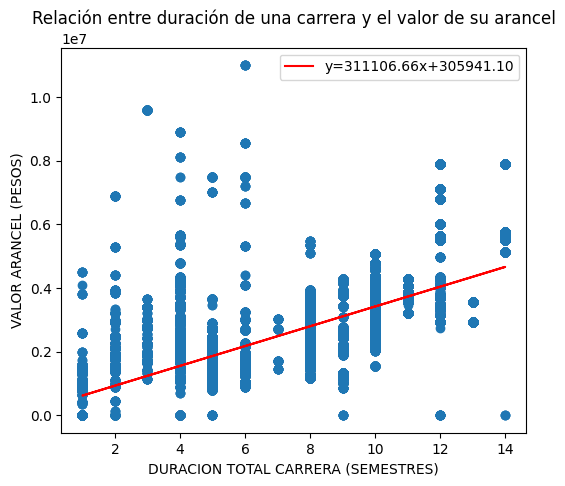

In [3]:
#Importamos la biblioteca Numpy para realizar un ajuste lineal
import numpy as np
#Importamos la librería Matplotlib.pyplot para realizar el gráfico
import matplotlib.pyplot as plt

#Definimos las variables
v_indep_1 = df_1['DURACION TOTAL CARRERA (SEMESTRES)']
v_depen_1 = df_1['VALOR ARANCEL (PESOS)']

modelo_1 = np.polyfit(v_indep_1, v_depen_1, 1)

pendiente_1, intercepto_1 = modelo_1

#Creamos el gráfico de dispersión
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep_1, v_depen_1)

# Línea de tendencia
ax.plot(v_indep_1, pendiente_1 * v_indep_1 + intercepto_1, color='red',
        label= f'y={pendiente_1:.2f}x+{intercepto_1:.2f}')

#Personalización
ax.set_title('Relación entre duración de una carrera y el valor de su arancel')
ax.set_xlabel('DURACION TOTAL CARRERA (SEMESTRES)')
ax.set_ylabel('VALOR ARANCEL (PESOS)')

ax.legend()
plt.show()

# Despues de construir el gráfico que abarca todas las carreras, vamos a realizar un gráfico para cada area de conocimiento con su respectivo coeficiente de determinacion el cual nos ayudara a validar su utilidad. 

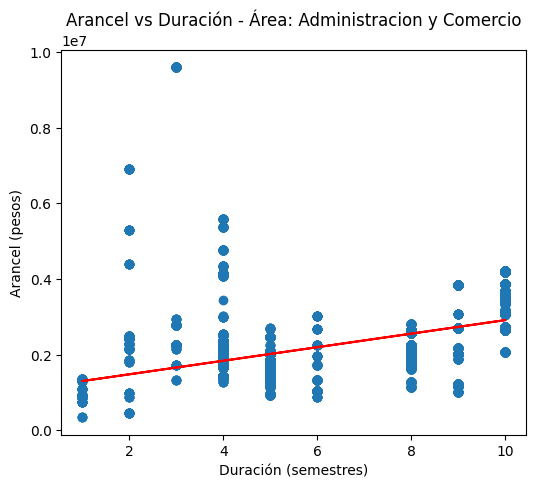

Coeficiente de determinación: 19.7%


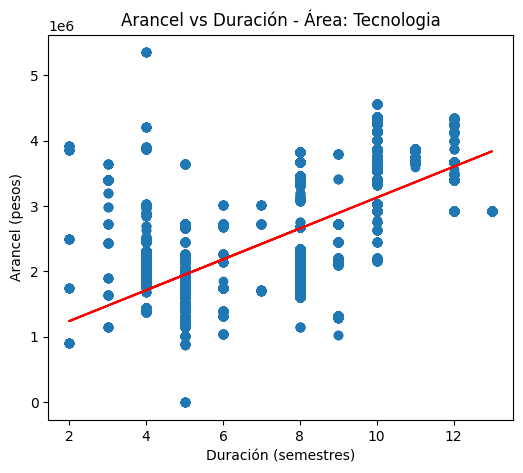

Coeficiente de determinación: 51.1%


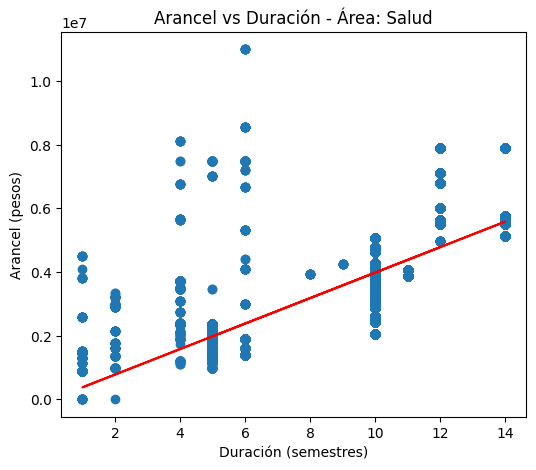

Coeficiente de determinación: 60.7%


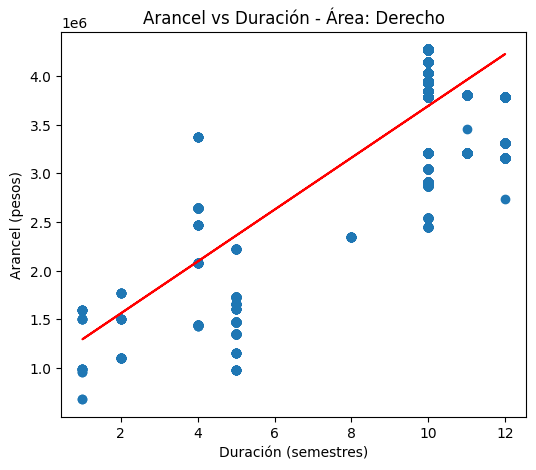

Coeficiente de determinación: 47.3%


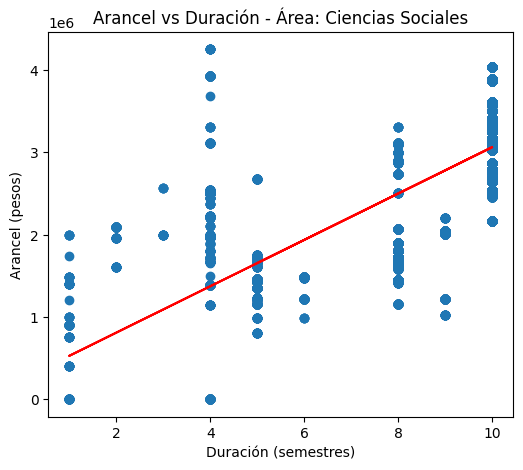

Coeficiente de determinación: 47.7%


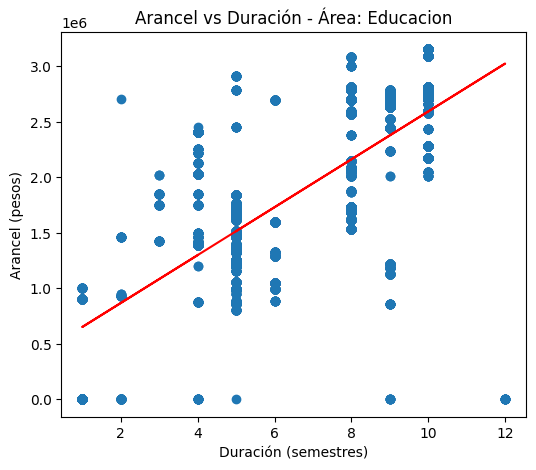

Coeficiente de determinación: 59.1%


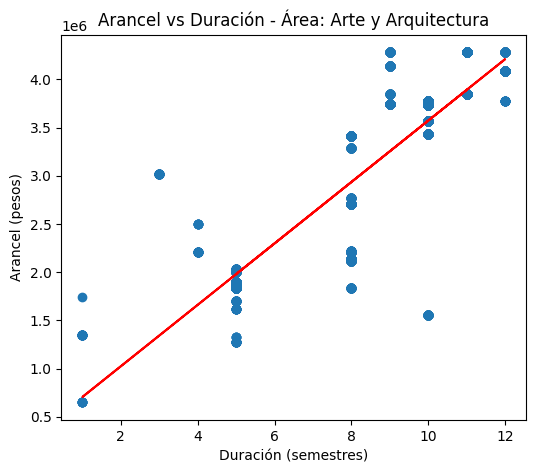

Coeficiente de determinación: 68.6%


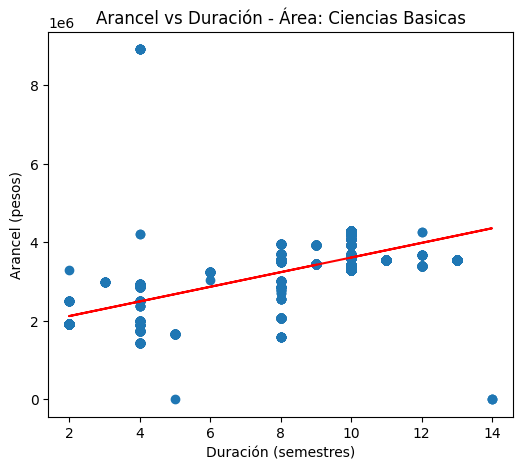

Coeficiente de determinación: 42.4%


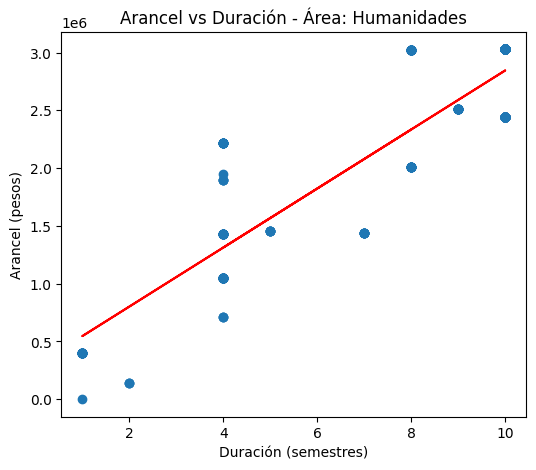

Coeficiente de determinación: 79.6%


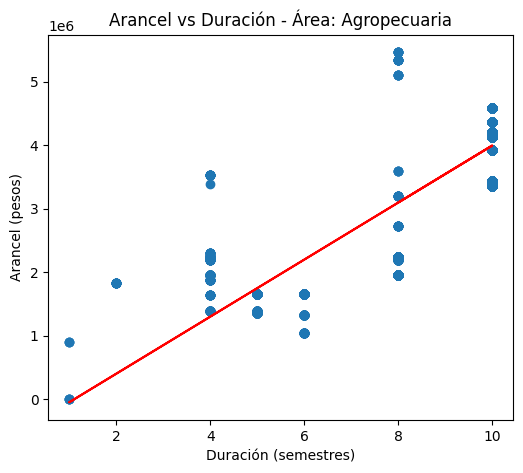

Coeficiente de determinación: 71.9%


In [7]:
#Importamos la función r2_score para calcular el coeficiente de determinación
from sklearn.metrics import r2_score

#Construimos un bucle que calcule un gráfico de dispersión para
#cada área de conocimiento cion que se encuentre en la lista declarada abajo llamada "areas".

areas = df_1['AREA CONOCIMIENTO'].unique()

for area in areas:
    df_a = df_1[df_1['AREA CONOCIMIENTO'] == area]

    #Definimos las variables
    v_indep_2 = df_a['DURACION TOTAL CARRERA (SEMESTRES)']
    v_depen_2 = df_a['VALOR ARANCEL (PESOS)']

    modelo_2 = np.polyfit(v_indep_2, v_depen_2, 1)

    pendiente_2, intercepto_2 = modelo_2
    
    # Gráfico
    plt.figure(figsize=(6,5))
    plt.scatter(v_indep_2, v_depen_2)
    plt.plot(v_indep_2, pendiente_2 * v_indep_2 + intercepto_2, color='red')
    
    plt.title(f"Arancel vs Duración - Área: {area}")
    plt.xlabel("Duración (semestres)")
    plt.ylabel("Arancel (pesos)")
    plt.show()

    #Vamos a calcular las predicciones de las ventas con nuestro modelo
    predicciones_duración = np.polyval(modelo_2, df_a['DURACION TOTAL CARRERA (SEMESTRES)'])

    #Calculamos en coeficiente de determinación
    r2_1 = r2_score(df_a['VALOR ARANCEL (PESOS)'], predicciones_duración)

    print(f'Coeficiente de determinación: {r2_1 * 100:.1f}%')

# Luego de analizar los graficos, logramos concluir que en cada área de conocimiento ocurre lo mismo, a medida que la duración de la carrera es más extensa, resulta más cara. No obstante, no ocurre de la misma forma, en areas de conocimiento como "Administración y Comercio" o "Ciencias Basicas" su linea de tendencia resulta ser mucho menos pronunciada que áreas como "Derecho" o "Arte y Arquitectura". Además de eso, podemos notar que el área Ciencias basicas posee una correlación lineal de pearson mucho más fuerte que todas las demás. Por ultimo, gracias al calculo del coeficiente de determinación, la mayoria de gráficos se encuentran sobre el 50% lo que nos dice claramente que son mas capaces de explicar la variabilidad de sus datos a través del modelo de regresión realizado previamente, comparado claramente con los gráficos que poseen un menos %.

# ITEM II 

# Para responder la siguiente pregunta, utilizaremos una tabla de frecuencias que nos permita comparar 

# ¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

In [10]:
#Creamos la tabla de frecuencias absolutas
tabla = pd.crosstab(df_1['MODALIDAD'], df_1['GENERO'], margins= True)

tabla

GENERO,Femenino,Masculino,All
MODALIDAD,,,
No Presencial,599,267,866
Presencial,62368,51180,113548
Semipresencial,574,476,1050
All,63541,51923,115464


# Al apreciar la tabla de frecuencia en la que la modalidad de estudio Presencial es la que abarca la mayor parte del terreno, mientras que la modalidad No Presencial o Semipresencial se ven claramente por muy debajo.

# ¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?

# Nuevamente para responder a esta pregunta vamos a hacer uso de una tabla de contingencia que nos permita analizar la modalidad a la que asisten los distintos estudiantes según el tipo de institución en la que esten matriculados, esta vez aplicaremos una multiplicación para obtener los valores en porcentajes.

In [12]:
tabla = pd.crosstab(df_1['TIPO DE INSTITUCION'], df_1['MODALIDAD'], normalize='index') * 100
round(tabla, 1)

MODALIDAD,No Presencial,Presencial,Semipresencial
TIPO DE INSTITUCION,,,
Centros de Formacion Tecnica,0.0,100.0,0.0
Institutos Profesionales,1.1,98.3,0.7
Universidades CRUCH,1.0,98.0,1.0
Universidades Privadas,0.4,98.0,1.6


# Como se muestra en la tabla, la modalidad No precencial apenas abarca el 1%, mientras que, por ejemplo, en los Centros de formación técnica el 100% de los estudiantes matriculados asiste de manera presencial.

# El ultimo analisis que realizamos fue acerca de la probabilidad de seleccionar a un estudiantes entre los hombresque pertenezca al área de educación? ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? ¿Hay una discrepancia aparente? ¿Cómo se explica?

# Primero, ¿Cual es la probabilidad de seleccionar a un estudiantes entre los hombresque pertenezca al área de educación?

In [ ]:
#Primero necesitamos obtener la cantidad de hombres que se encuentren estudiando dentro del área de educación
#Probabilidad condicional: usamos normalize='index' para dividir por el total de cada fila
tabla3 = pd.crosstab(df_1['GENERO'], df_1['AREA CONOCIMIENTO'], normalize= 'index') * 100

round(tabla3, 1)

AREA CONOCIMIENTO,Administracion y Comercio,Agropecuaria,Arte y Arquitectura,Ciencias Basicas,Ciencias Sociales,Derecho,Educacion,Humanidades,Salud,Tecnologia
GENERO,,,,,,,,,,
Femenino,15.7,3.1,3.2,2.4,12.8,4.9,15.7,0.4,31.3,10.5
Masculino,13.6,3.1,3.0,3.5,6.6,4.0,6.3,0.4,13.0,46.5


# Procedemos a calcular la probabilidad solicitada, siendo esta una probabilidad Condicional, ya que
# solo estamos escojiendo estudiantes que pertenezcan al grupo masculino, es de ese grupo en donde 
# calculamos la probabilidad de que este dentro del área de Educación, en este caso la probabilidad de que aquello
# ocurra es de un 6.3%.

# Para la pregunta " ¿Cuál es la probabilidad de seleccionar de las estudiantes mujeres de la región a una del área de educación? " podemos deducir que la probabilidad es 15.7%, osea que definitivamente segun la base de datos
# entregada por el docente, en las regiones de Los Rios, Arica, Antofagasta y Atacama, la probabilidad de que una mujer estudie en el área de educación es mayor que la probabilidad de que un hombre estudie en el área de educación.

# ¿Hay una discrepancia aparente? ¿Cómo se explica?
# Como mencionamos recientemente las matrículas que se encuentran en la BD reflejan que hay mayor 
# presencia de mujeres en el área de la educación.

# Adicional al trabajo solicitado, consideramos importante calcular alguna probabilidad conjunta, en este caso
# descidimos calcular la probabilidad de que un estudiante se matricule en x region y el año en el que se matriculo sea x.

In [16]:
#Probabilidad conjunta: usamos normalize='all' para dividir cada frecuencia en el total de registros.
tabla4= pd.crosstab(df_1['REGION SEDE'], df_1['AÑO INGRESO'], normalize= 'all') * 100

round(tabla4, 1)

AÑO INGRESO,1990,1991,1992,1995,1996,1997,1998,1999,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
REGION SEDE,,,,,,,,,,,,,,,,,,,,,
Antofagasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.4,0.7,1.1,2.0,3.3,4.6,6.2,8.4
Atacama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.2,0.3,0.4,0.6,1.0,1.5,2.1,3.1
La Araucania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.3,0.6,1.3,2.4,3.9,5.4,7.6,9.4,12.5
Los Rios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.2,0.4,0.7,1.1,1.7,2.5,3.3,4.1,5.3


# Finalizando, podemos afirmar que segun los datos de la BD, que dentro de las sedes de la region de la Araucania y en el año 2021, era mucho más probable que un estudiante se matriculara.